In [4]:
import pandas as pd

In [5]:
df = pd.read_csv('records-for-2016.csv')

In [6]:
df.head()

,Agency,Create Time,Location,Area Id,Beat,Priority,Incident Type Id,Incident Type Description,Event Number,Closed Time
0,OP,2011-01-01T00:00:00.000,ST&SAN PABLO AV,1.0,06X,1.0,PDOA,POSSIBLE DEAD PERSON,LOP110101000001,2011-01-01T00:28:17.000
1,OP,2011-01-01T00:01:11.000,ST&HANNAH ST,1.0,07X,1.0,415GS,415 GUNSHOTS,LOP110101000002,2011-01-01T01:12:56.000
2,OP,2011-01-01T00:01:25.000,ST&MARKET ST,1.0,10Y,2.0,415GS,415 GUNSHOTS,LOP110101000003,2011-01-01T00:07:20.000
3,OP,2011-01-01T00:01:35.000,PRENTISS ST,2.0,21Y,2.0,415GS,415 GUNSHOTS,LOP110101000005,2011-01-01T00:02:28.000
4,OP,2011-01-01T00:02:10.000,AV&FOOTHILL BLVD,2.0,20X,1.0,415GS,415 GUNSHOTS,LOP110101000004,2011-01-01T00:50:04.000


In [14]:
cols = ['Agency', 'Location', 'Area Id', 'Beat',
       'Incident Type Id', 'Incident Type Description']
for col in cols:
    print('='*20 + col + '='*20)
    print(df[col].value_counts())

====================Agency====================
OP    180015
Name: Agency, dtype: int64
====================Location====================
 INTERNATIONAL BLVD             3866
 MACARTHUR BLVD                 3129
 AV&INTERNATIONAL BLVD          3067
 BROADWAY                       2132
 FOOTHILL BLVD                  1791
 TELEGRAPH AV                   1584
 BANCROFT AV                    1319
 SAN PABLO AV                   1272
 FRUITVALE AV                   1141
 7TH ST                         1093
 AV&MACARTHUR BLVD              1063
 ST&BROADWAY                    1025
 HEGENBERGER RD                 1024
 HARRISON ST                     990
 HIGH ST                         987
 ST&TELEGRAPH AV                 984
 73RD AV                         976
 MARKET ST                       840
 14TH ST                         824
 AV&FOOTHILL BLVD                761
 WEBSTER ST                      680
 W MACARTHUR BLVD                668
 AV&BANCROFT AV                  667
 ST&MARTIN LU

In [25]:
cols = ['Priority']
for col in cols:
    print('='*20 + col + '='*20)
    print('最大值', df[col].max())
    print('最小值', df[col].min())
    print('均值', df[col].mean())
    print('中位数', df[col].median())
    print('四分位数','1/4:',df[col].quantile(0.25),'3/4:',df[col].quantile(0.75))
    print('缺失值个数', len(df[col]) - df[col].count())

====================Priority====================
最大值 2.0
最小值 0.0
均值 1.7961114351581813
中位数 2.0
四分位数 1/4: 2.0 3/4: 2.0
缺失值个数 1


====================Priority====================


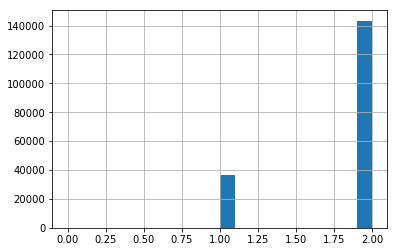

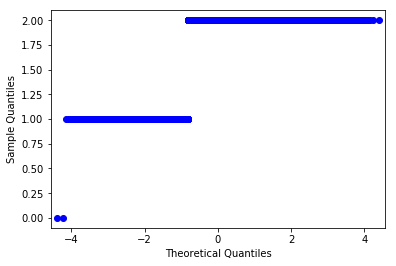

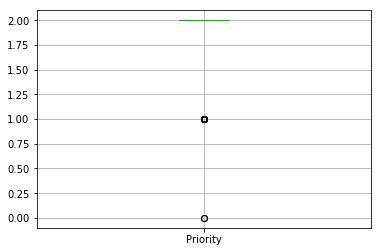

In [73]:
# 绘制直方图
# 用qq图检验其分布是否为正态分布
import pylab 
import statsmodels.api as sm
from pandas.core import datetools
cols = ['Priority']
for col in cols:
    print('='*20 + col + '='*20)
    df[col].hist(bins=20)
    sm.qqplot(df[col])
    pylab.show()
# 绘制盒图
df.boxplot(column=cols)

In [42]:
cols = df.columns
for col in cols:
    print(col,'缺失量',len(df[col]) - df[col].count(), '缺失占比(%)',round((len(df[col]) - df[col].count()) / len(df[col]) * 100,5))

Agency 缺失量 1 缺失占比(%) 0.00056
Create Time 缺失量 1 缺失占比(%) 0.00056
Location 缺失量 0 缺失占比(%) 0.0
Area Id 缺失量 904 缺失占比(%) 0.50218
Beat 缺失量 520 缺失占比(%) 0.28886
Priority 缺失量 1 缺失占比(%) 0.00056
Incident Type Id 缺失量 1 缺失占比(%) 0.00056
Incident Type Description 缺失量 1 缺失占比(%) 0.00056
Event Number 缺失量 1 缺失占比(%) 0.00056
Closed Time 缺失量 7 缺失占比(%) 0.00389


In [58]:
cols = ['Agency', 'Create Time', 'Priority','Incident Type Id', 'Incident Type Description','Event Number']
for col in cols:
    print(col,'缺失值id',np.where(df['Create Time'].isnull())[0][0])

Agency 缺失值id 180015
Create Time 缺失值id 180015
Priority 缺失值id 180015
Incident Type Id 缺失值id 180015
Incident Type Description 缺失值id 180015
Event Number 缺失值id 180015


第180015条记录整体缺失，导致了Agency，Create Time，Priority，Incident Type Id，Incident Type Description,Event Number 均存在一个缺失值

4种缺失值处理方式：

#### (1)将缺失部分剔除

In [60]:
new_df = df.drop(180015)

====================Priority====================


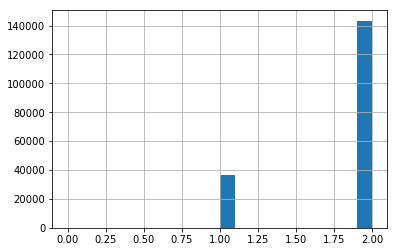

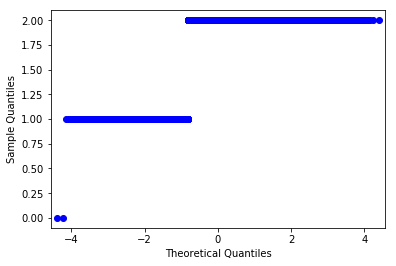

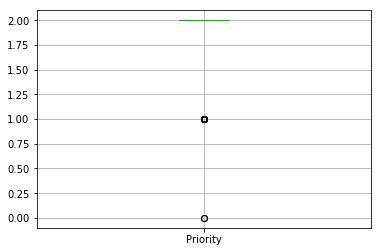

In [74]:
# 剔除后数据可视化
cols = ['Priority']
for col in cols:
    print('='*20 + col + '='*20)
    new_df[col].hist(bins=20)
    sm.qqplot(new_df[col])
    pylab.show()
# 绘制盒图
new_df.boxplot(column=cols)

#### (2)用最高频率值来填补缺失值

In [65]:
# 计算众数
Priority_mode = df['Priority'].mode()

In [66]:
Priority_mode

0    2.0
dtype: float64

In [68]:
df.at[180015,'Priority'] = 2.0

In [71]:
df.loc[180015]

Agency                       NaN
Create Time                  NaN
Location                        
Area Id                      NaN
Beat                         NaN
Priority                       2
Incident Type Id             NaN
Incident Type Description    NaN
Event Number                 NaN
Closed Time                  NaN
Name: 180015, dtype: object

====================Priority====================


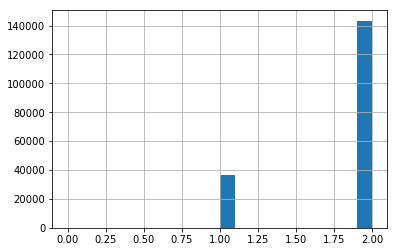

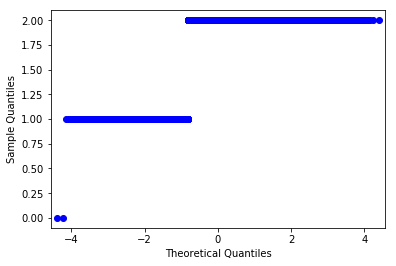

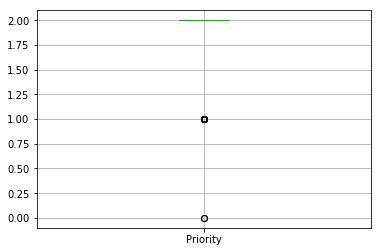

In [75]:
# 用最高频率值来填补缺失后数据可视化
cols = ['Priority']
for col in cols:
    print('='*20 + col + '='*20)
    new_df[col].hist(bins=20)
    sm.qqplot(new_df[col])
    pylab.show()
# 绘制盒图
new_df.boxplot(column=cols)